In [109]:
#请使用附录（data.xlsx）给出的全球新冠疫情的主要数据，
# 对新冠疫情的走势进行预测，给出相关预测结果，
# 比如：疫情结束的时间、全球最终感染的人数、全球因为新冠疫情最终死亡的人数等

In [110]:
#调用包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
data=pd.read_excel("2021校内竞赛附录：data.xlsx")
print(data[data.isnull().T.any()])
print("---------------------------------")
data

Empty DataFrame
Columns: [日期, 累计确诊, 治愈人数, 死亡人数]
Index: []
---------------------------------


,日期,累计确诊,治愈人数,死亡人数
0,2020-01-26,2011,51,56
1,2020-01-27,2785,60,82
2,2020-01-28,5344,103,131
3,2020-01-29,5908,126,133
4,2020-01-30,7893,171,171
...,...,...,...,...
456,2021-04-26,22840826,121911107,3120469
457,2021-04-27,22755774,122826142,3134956
458,2021-04-28,22914640,123557549,3150675
459,2021-04-29,22874247,124480554,3165665


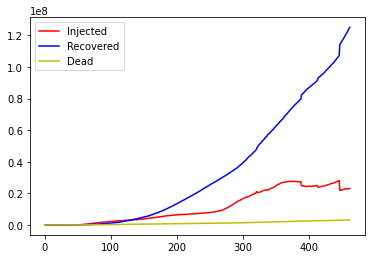

In [112]:
x=list(range(1,data.shape[0]+1))
y1=data['累计确诊'].tolist()
y2=data['治愈人数'].tolist()
y3=data['死亡人数'].tolist()
plt.plot(x,y1,'r',label='Injected')
plt.plot(x,y2,'b',label='Recovered')
plt.plot(x,y3,'y',label='Dead')
plt.legend()
plt.show()

In [113]:
def delta_s(beta,s,i,n):
    return (-beta*s*i/n)
def delta_e(beta,s,i,n,r1,e):
    return (beta*s*i/n-r1*e)
def delta_i(r1,e,r2d,r2r,i):
    return r1*e-r2d*i-r2r*i
def delta_r(r2r,i):
    return r2r*i
def delta_d(r2d,i):
    return r2d*i
def count(s,e,i,r,d,beta,r1,r2d,r2r,n):
    s=s;e=e;i=i;r=r;d=d;beta=beta;r1=r1;r2d=r2d;r2r=r2r;n=n
    S=[s];E=[e];I=[i];R=[r];D=[d]
    for m in range(30):
        ds=delta_s(beta,s,i,n)
        de=delta_e(beta,s,i,n,r1,e)
        di=delta_i(r1,e,r2d,r2r,i)
        dr=delta_r(r2r,i)
        dd=delta_d(r2d,i)
        s=s+ds
        e=e+de
        i=i+di
        r=r+dr
        d=d+dd
        S.append(s)
        E.append(e)
        I.append(i)
        R.append(r)
        D.append(d)
    result=pd.DataFrame({
        'S':S,
        'E':E,
        '累计确诊':I,
        '治愈人数':R,
        '死亡人数':D
        })
    return result
def loss(beta,r1,e0,r2d,r2r):
    n=7585204179#总人口数
    e=e0#初始的感染但是并没有发病的数量
    i=y1[0]#初始的感染数量
    r=y2[0]#初始的治愈数量
    d=y3[0]#初始的死亡数量
    s=n-e-i-r-d#未被感染数
    beta=beta
    r1=r1
    r2d=r2d
    r2r=r2r
    predict=count(s,e,i,r,d,beta,r1,r2d,r2r,n)
    Inject_predict=np.array(predict['累计确诊'].tolist())
    Recovered_predict=np.array(predict['治愈人数'].tolist())
    Dead_predict=np.array(predict['死亡人数'].tolist())
    Inject_true=np.array(data.iloc[:31,1].tolist())
    Recovered_true=np.array(data.iloc[:31,2].tolist())
    Dead_true=np.array(data.iloc[:31,3].tolist())
    loss1=np.sum((Inject_predict-Inject_true)**2)
    loss2=np.sum((Recovered_predict-Recovered_true)**2)
    loss3=np.sum((Dead_predict-Dead_true)**2)
    loss=loss1+loss2+loss3
    return 10000000/loss

In [114]:
import random
import math
import matplotlib.pyplot as plt
#初始化生成chromosome_length大小的population_size个个体的二进制基因型种群
def species_origin(population_size,chromosome_length):
    population=[[]]
    #二维列表，包含染色体和基因
    for i in range(population_size):
        temporary=[]
        #染色体暂存器
        for j in range(chromosome_length):
            temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成
        population.append(temporary)
            #将染色体添加到种群中
    return population[1:]
def translation(population):
    temporary=[]
    for i in range(len(population)):
        temp_beta=0
        temp_r1=0
        temp_e0=0
        temp_r2d=0
        temp_r2r=0
        for j in range(0,15):
            temp_beta+=population[i][j]*(math.pow(2,j))/32768.0
        for j in range(15,30):
            temp_r1+=population[i][j]*(math.pow(2,j-15))/32768.0
        for j in range(30,50):
            temp_e0+=population[i][j]*(math.pow(2,j-30))
        for j in range(50,65):
            temp_r2d+=population[i][j]*(math.pow(2,j-50))/32768.0
        for j in range(65,80):
            temp_r2r+=population[i][j]*(math.pow(2,j-65))/32768.0
        total=[temp_beta,temp_r1,temp_e0,temp_r2d,temp_r2r]
        temporary.append(total)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
    return temporary
def function(temporary):
    ##本函数返回每个个体的损失值
    function1=[]
    for i in range(len(temporary)):
        x=loss(temporary[i][0],temporary[i][1],temporary[i][2],temporary[i][3],temporary[i][4])
        #一个基因代表一个决策变量，其算法是先转化成十进制，然后再除以2的基因个数次方减1(固定值)。
        function1.append(x)
    return function1
def sum(fitness1):
    total=0
    for i in range(len(fitness1)):
        total+=fitness1[i]
    return total
def newborn(population,born_size,chromosome_length):
    population=population
    #二维列表，包含染色体和基因
    for i in range(born_size):
        temporary=[]
        #染色体暂存器
        for j in range(chromosome_length):
            temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成
        population.append(temporary)
            #将染色体添加到种群中
    return population[1:]

In [115]:
def random_pick(some_list,probabilities,size):
    item_list=[]
    i=0
    while i<size:
        for item,item_probability in zip(some_list,probabilities):
            x=random.uniform(0,1)
            cumulative_probability=item_probability
            if x < cumulative_probability:
                item_list.append(item)
                i=i+1
    return item_list

def selection(population,next_size,fitness1):
    new_fitness=[]
    #单个适应度暂存器
    total_fitness=sum(fitness1)
    #将所有的适应度求和
    for i in range(len(fitness1)):
        new_fitness.append(fitness1[i]/total_fitness)
    select=random_pick(list(range(len(new_fitness))),new_fitness,next_size)
    result=[]
    for i in select:
        result.append(population[i])
    return result

In [116]:
def crossover(population):
#pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
    pop_len=len(population)

    for i in range(pop_len-1):
        cpoint=random.randint(0,len(population[0]))
        #在种群个数内随机生成单点交叉点
        temporary1=[]
        temporary2=[]

        temporary1.extend(population[i][0:cpoint])
        temporary1.extend(population[i+1][cpoint:len(population[i])])
        #将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
        #然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面

        temporary2.extend(population[i+1][0:cpoint])
        temporary2.extend(population[i][cpoint:len(population[i])])
        # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
        # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
        population[i]=temporary1
        population[i+1]=temporary2
    return population
def mutation(population,pm):
    # pm是概率阈值
    px=len(population)
    # 求出种群中所有个体的个数
    py=len(population[0])
    # 染色体/个体中基因的个数
    for i in range(px):
        if(random.random()<pm):
        #如果小于阈值就变异
            mpoint=random.randint(0,py-1)
            # 生成0到py-1的随机数
            if(population[i][mpoint]==1):
            #将mpoint个基因进行单点随机变异，变为0或者1
                population[i][mpoint]=0
            else:
                population[i][mpoint]=1
    return population

In [117]:
def best(population,fitness1):

    px=len(population)
    bestindividual=[]
    bestfitness=fitness1[0]

    for i in range(1,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
        if(fitness1[i]>bestfitness):

            bestfitness=fitness1[i]
            bestindividual=population[i]

    return [bestindividual,bestfitness]
def next_best(population,fitness1,temp_individual,temp_fitness):

    px=len(population)
    bestindividual=temp_individual
    bestfitness=temp_fitness

    for i in range(0,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
        if(fitness1[i]>bestfitness):

            bestfitness=fitness1[i]
            bestindividual=population[i]

    return [bestindividual,bestfitness]

In [118]:
population_size=500
chromosome_length=80
population=species_origin(population_size,chromosome_length)
results=[]
pm=0.5
for m in range(300):
    temporary=translation(population)
    fitness1=function(temporary)
    if m==0:
        best_individual,best_fitness=best(population,fitness1)
    else:
        best_individual,best_fitness=next_best(population,fitness1,best_individual,best_fitness)
    print(10000000/best_fitness)
    results.append([best_fitness,best_individual])
     #将最好的个体和最好的适应度保存，并将最好的个体转成十进制
    population=selection(population,450,fitness1)#选择
    population=crossover(population)#交配
    population=mutation(population,pm)#变异

19730980583.84682
11810313051.175226
9572051385.80875
9533262247.063946
9533262247.063946
9132080146.140759
7743767393.893803
4479711802.900247
2029541606.1728168
2029541606.1728168
1544972409.7309084
1544804591.5738592
1462208682.1344748
1450892377.815205
1450892377.815205
1390709573.831737
1390709573.831737
1384241559.251201
1373415508.8270533
1369549101.2373688
1369549101.2373688
1369549101.2373688
1354899218.3203452
1354899218.3203452
1354899218.3203452
1354674865.3771331
1354674865.3771331
1354674865.3771331
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1349211050.2870889
1347089116.1153064
1347089116.1153064
1347089116.1153064
1347089116.1153064
1347089116.1153064
1347089116.1153064
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754579
1338417837.754

In [119]:
best=[]
best.append(best_individual)
print(best_individual)
print(translation(best))
print(10000000/best_fitness)

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[[0.001861572265625, 0.004547119140625, 674249.0, 0.003143310546875, 0.023284912109375]]
1329468292.312856


In [120]:
first=translation(best)

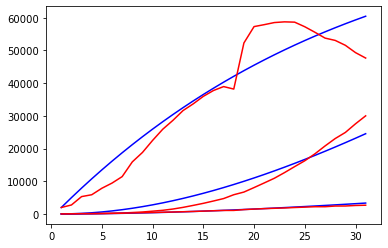

In [121]:
def yuce(beta,r1,e0,r2d,r2r):
    n=7585204179#总人口数
    e=e0#初始的感染但是并没有发病的数量
    i=y1[0]#初始的感染数量
    r=y2[0]#初始的治愈数量
    d=y3[0]#初始的死亡数量
    s=n-e-i-r-d#未被感染数
    beta=beta
    r1=r1
    r2d=r2d
    r2r=r2r
    predict=count(s,e,i,r,d,beta,r1,r2d,r2r,n)
    return predict
predict=yuce(first[0][0],first[0][1],first[0][2],first[0][3],first[0][4])
Inject_predict=np.array(predict['累计确诊'].tolist())
Recovered_predict=np.array(predict['治愈人数'].tolist())
Dead_predict=np.array(predict['死亡人数'].tolist())
Inject_true=np.array(data.iloc[:31,1].tolist())
Recovered_true=np.array(data.iloc[:31,2].tolist())
Dead_true=np.array(data.iloc[:31,3].tolist())
x=list(range(1,len(Inject_predict)+1))
plt.plot(x,Inject_predict,'b')
plt.plot(x,Inject_true,'r')
plt.plot(x,Recovered_predict,'b')
plt.plot(x,Recovered_true,'r')
plt.plot(x,Dead_predict,'b')
plt.plot(x,Dead_true,'r')
plt.show()

In [122]:
predict

,S,E,累计确诊,治愈人数,死亡人数
0,7.584528e+09,674249.000000,2011.000000,51.000000,56.000000
1,7.584528e+09,671186.852755,5023.743378,97.825958,62.321198
2,7.584528e+09,668144.237397,7942.941354,214.803381,78.112383
3,7.584528e+09,665120.890987,10771.154982,399.754073,103.079514
4,7.584528e+09,662116.556548,13510.876434,650.559470,136.936599
5,7.584528e+09,659130.982911,16164.530851,965.159040,179.405480
6,7.584528e+09,656163.924561,18734.478139,1341.548720,230.215620
7,7.584528e+09,653215.141495,21223.014720,1777.779397,289.103903
8,7.584528e+09,650284.399074,23632.375235,2271.955429,355.814429
9,7.584528e+09,647371.467886,25964.734198,2822.233210,430.098323


In [123]:
def month_species_origin(population_size,chromosome_length):
    population=[[]]
    #二维列表，包含染色体和基因
    for i in range(population_size):
        temporary=[]
        #染色体暂存器
        for j in range(chromosome_length):
            temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成
        population.append(temporary)
            #将染色体添加到种群中
    return population[1:]

def month_translation(population):
    temporary=[]
    for i in range(len(population)):
        temp_beta=0
        temp_r1=0
        temp_r2d=0
        temp_r2r=0
        for j in range(0,15):
            temp_beta+=population[i][j]*(math.pow(2,j))/32768.0
        for j in range(15,30):
            temp_r1+=population[i][j]*(math.pow(2,j-15))/32768.0
        for j in range(30,45):
            temp_r2d+=population[i][j]*(math.pow(2,j-30))/32768.0
        for j in range(45,60):
            temp_r2r+=population[i][j]*(math.pow(2,j-45))/32768.0
        total=[temp_beta,temp_r1,temp_r2d,temp_r2r]
        temporary.append(total)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
    return temporary
def month_loss(beta,r1,e0,r2d,r2r,month):
    n=7585204179#总人口数
    e=e0#初始的感染但是并没有发病的数量
    i=y1[30*month]#初始的感染数量
    r=y2[30*month]#初始的治愈数量
    d=y3[30*month]#初始的死亡数量
    s=n-e-i-r-d#未被感染数
    beta=beta
    r1=r1
    r2d=r2d
    r2r=r2r
    predict=count(s,e,i,r,d,beta,r1,r2d,r2r,n)
    Inject_predict=np.array(predict['累计确诊'].tolist())
    Recovered_predict=np.array(predict['治愈人数'].tolist())
    Dead_predict=np.array(predict['死亡人数'].tolist())
    Inject_true=np.array(data.iloc[30*month:30*(month+1)+1,1].tolist())
    Recovered_true=np.array(data.iloc[30*month:30*(month+1)+1,2].tolist())
    Dead_true=np.array(data.iloc[30*month:30*(month+1)+1,3].tolist())
    loss1=np.sum((Inject_predict-Inject_true)**2)
    loss2=np.sum((Recovered_predict-Recovered_true)**2)
    loss3=np.sum((Dead_predict-Dead_true)**2)
    loss=loss1+loss2+loss3
    return 10000000/loss
def month_function(temporary,e0,month):
    ##本函数返回每个个体的损失值
    function1=[]
    for i in range(len(temporary)):
        x=month_loss(temporary[i][0],temporary[i][1],e0,temporary[i][2],temporary[i][3],month)
        #一个基因代表一个决策变量，其算法是先转化成十进制，然后再除以2的基因个数次方减1(固定值)。
        function1.append(x)
    return function1
def month_best(population,fitness1):

    px=len(population)
    bestindividual=[]
    bestfitness=fitness1[0]

    for i in range(1,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
        if(fitness1[i]>bestfitness):

            bestfitness=fitness1[i]
            bestindividual=population[i]

    return [bestindividual,bestfitness]
def month_yuce(beta,r1,e0,r2d,r2r,month):
    n=7585204179#总人口数
    e=e0#初始的感染但是并没有发病的数量
    i=y1[30*month]#初始的感染数量
    r=y2[30*month]#初始的治愈数量
    d=y3[30*month]#初始的死亡数量
    s=n-e-i-r-d#未被感染数
    beta=beta
    r1=r1
    r2d=r2d
    r2r=r2r
    predict=count(s,e,i,r,d,beta,r1,r2d,r2r,n)
    return predict
def month_yichuan(e0,month):
    population_size=500
    chromosome_length=60
    population=month_species_origin(population_size,chromosome_length)
    results=[]
    pm=0.5
    for m in range(300):
        temporary=month_translation(population)
        fitness1=month_function(temporary,e0,month)
        if m==0:
            best_individual,best_fitness=month_best(population,fitness1)
        else:
            best_individual,best_fitness=next_best(population,fitness1,best_individual,best_fitness)
        print(10000000/best_fitness)
        results.append([best_fitness,best_individual])
         #将最好的个体和最好的适应度保存，并将最好的个体转成十进制
        population=selection(population,500,fitness1)#选择
        population=crossover(population)#交配
        population=mutation(population,pm)#变异
    mybest=[]
    mybest.append(best_individual)
    print(best_individual)
    print(month_translation(mybest))
    first=month_translation(mybest)
    predict=month_yuce(first[0][0],first[0][1],e0,first[0][2],first[0][3],month)
    Inject_predict=np.array(predict['累计确诊'].tolist())
    Recovered_predict=np.array(predict['治愈人数'].tolist())
    Dead_predict=np.array(predict['死亡人数'].tolist())
    Inject_true=np.array(data.iloc[30*month:30*(month+1)+1,1].tolist())
    Recovered_true=np.array(data.iloc[30*month:30*(month+1)+1,2].tolist())
    Dead_true=np.array(data.iloc[30*month:30*(month+1)+1,3].tolist())
    x=list(range(1,len(Inject_predict)+1))
    plt.figure(1)
    plt.plot(x,Inject_predict,'b')
    plt.plot(x,Inject_true,'r')
    plt.figure(2)
    plt.plot(x,Recovered_predict,'b')
    plt.plot(x,Recovered_true,'r')
    plt.figure(3)
    plt.plot(x,Dead_predict,'b')
    plt.plot(x,Dead_true,'r')
    plt.show()
    return predict

589956.9444738675
691089501524.5405
659688855326.426
525087582744.80286
517084019673.95184
470309901074.7554
470309901074.7554
300045786900.65283
300045786900.65283
299463115297.0387
245003609991.25772
245003609991.25772
243088414841.7671
232961567149.1414
232961567149.1414
193366317359.57593
183907226606.71082
140531375400.7043
129472582266.26924
104702633548.57787
97573839560.75275
78192675927.97272
78035988291.21132
72328410016.857
71764398437.12427
71764398437.12427
71286464556.69899
71286464556.69899
71286464556.69899
71286464556.69899
71286464556.69899
71286464556.69899
71265618921.00356
71265618921.00356
71265618921.00356
71265618921.00356
71265618921.00356
71265618921.00356
71265618921.00356
71265618921.00356
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
71234608472.04128
712

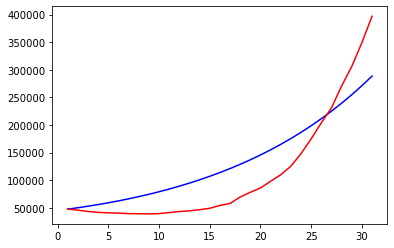

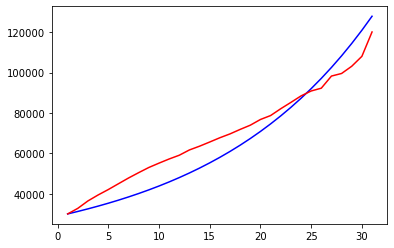

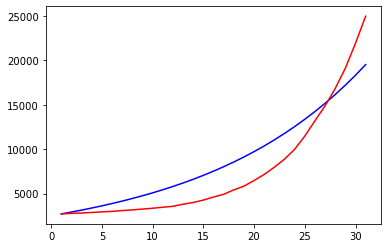

In [124]:
e0=predict.iloc[30,1]
print(e0)
i=0
predict.to_csv('predict'+str(i)+'.csv',index=False)
predict=month_yichuan(e0,1)
i=1
predict.to_csv('predict'+str(i)+'.csv',index=False)

46819972734179.48
46539995698530.92
33585529377262.492
31911458802140.766
29586897307210.94
26926395449065.37
23717630311382.97
23717630311382.97
23476613346548.64
16396208186918.592
16396208186918.592
14871626445432.637
14619798580656.088
14619798580656.088
6900719480716.563
6900719480716.563
4175470886767.125
3166463106751.7715
2400926611573.316
715858554189.2485
701534777906.0159
545580801191.95435
536860224788.3693
320068242825.52264
312790318604.41766
169193051120.29535
54555627371.11885
54405018575.92882
54405018575.92882
53873965725.30137
38773550842.17984
28446054400.92029
27882068797.39766
26802094103.684933
26781087747.609406
26781087747.609406
26174707008.083183
21115516686.958946
21115516686.958946
21115516686.958946
21115516686.958946
21115516686.958946
21115516686.958946
21115516686.958946
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690663438.60106
20690

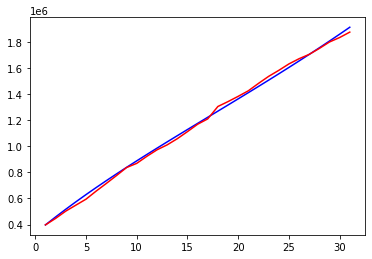

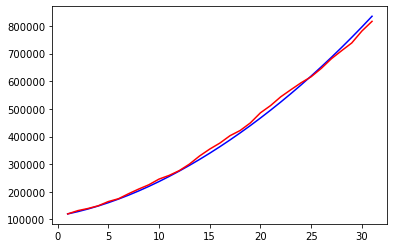

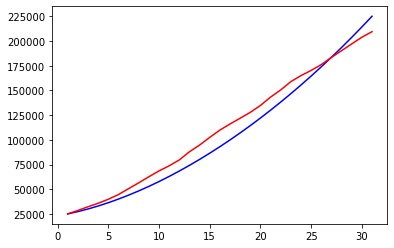

In [125]:
i=2
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

203068812650909.38
187103360631247.75
159421677769936.56
155286184278466.75
144551279228913.5
144551279228913.5
143119129547534.7
111800979066691.8
73212724788638.25
13673061508660.562
12799276060849.254
3366774028554.484
2993702893003.86
2449753715154.3706
2021131406090.25
1488921765818.0005
764642680099.7792
762039425491.2031
762039425491.2031
757304990307.3472
178014282670.37585
151306480947.98636
148518050656.5367
99694917285.40373
97413012331.09517
92644382519.89688
87323830088.593
87323830088.593
87323830088.593
84130422273.12732
84130422273.12732
84130422273.12732
83504659961.30588
82889855610.65964
82889855610.65964
82572855092.74664
82572855092.74664
81995550371.42496
81995550371.42496
81995550371.42496
81995550371.42496
81995550371.42496
81995550371.42496
81995550371.42496
81376729602.14894
81376729602.14894
81376729602.14894
80326480060.70851
80326480060.70851
80278131476.99179
80278131476.99179
80278131476.99179
80278131476.99179
80278131476.99179
80278131476.99179
80278131

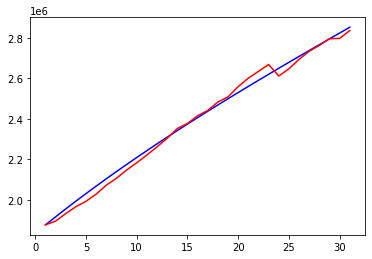

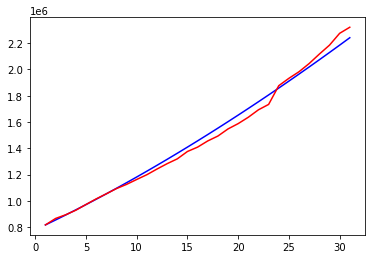

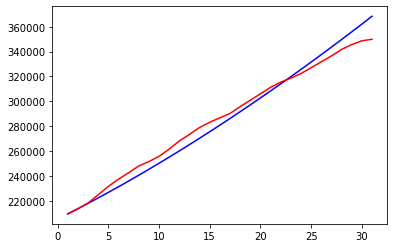

In [126]:
i=3
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

405797874031225.94
380621764993009.56
345784329514994.6
337886445542946.44
337886445542946.44
337886445542946.44
337886445542946.44
299923007576006.0
197029873133922.94
197029873133922.94
197029873133922.94
197029873133922.94
88966554851728.48
88966554851728.48
88966554851728.48
88966554851728.48
88966554851728.48
76274897405189.78
52703316587152.56
39268456205403.22
3376722507626.9355
2278471256805.497
91203955048.31538
85316019683.04382
62347211719.41641
62347211719.41641
62265255729.56429
60583107563.74279
60583107563.74279
60583107563.74279
58319066539.72973
58319066539.72973
58319066539.72973
58319066539.72973
58319066539.72973
58319066539.72973
57942820067.73447
57942820067.73447
57942820067.73447
57942820067.73447
57462172722.99231
57462172722.99231
57462172722.99231
57462172722.99231
57462172722.99231
54340140814.787125
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.57542
53493525538.5754

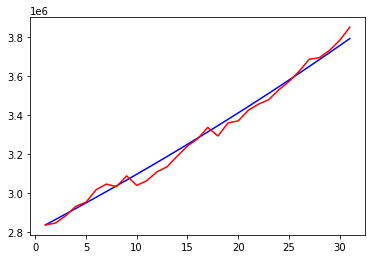

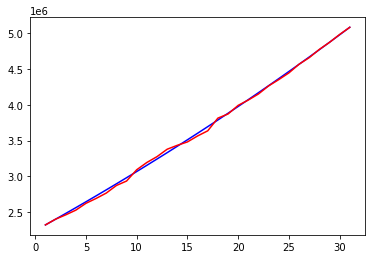

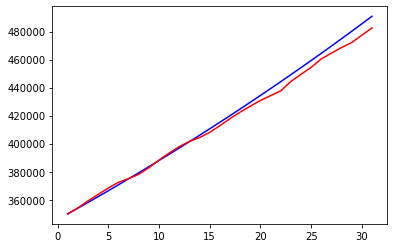

In [127]:
i=4
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

848228976566655.8
800034657991794.4
717228840962110.8
704184214217551.0
603647306512064.1
545856257519978.25
495549099693598.75
359552024193249.9
359552024193249.9
359552024193249.9
359552024193249.9
339358838923974.8
124125430996038.8
29934097138186.188
29152461708187.953
11868574742949.707
6153550822078.245
5698425296218.494
3071326826789.934
3071326826789.934
2191607280440.3408
2037120774777.009
1882662630068.4578
1710579067650.057
1443736946123.543
1443736946123.543
1443736946123.543
1385295083943.3657
1298626042808.9077
1251002505249.4712
1096203039397.6729
1096203039397.6729
1096203039397.6729
1096203039397.6729
1069490741189.6001
1069490741189.6001
1069490741189.6001
1069490741189.6001
1069490741189.6001
1069186726051.5056
1067702884500.7684
1067702884500.7684
1067320431916.9125
1067320431916.9125
1067320431916.9125
1067320431916.9125
1061393091209.009
1043048647111.1178
1042255715718.4099
1042255715718.4099
1042255715718.4099
1042255715718.4099
1042255715718.4099
1042255715718.

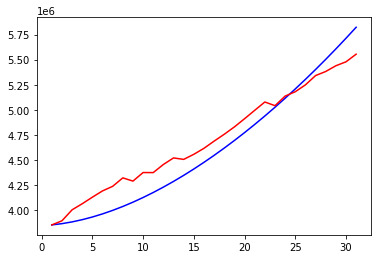

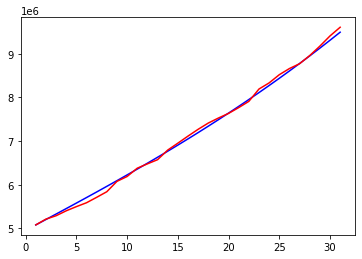

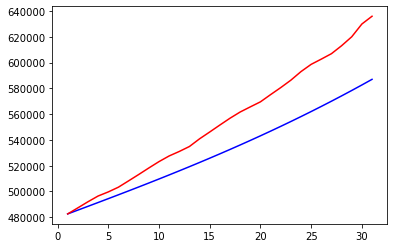

In [128]:
i=5
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

1289837205497729.5
1175838839397227.2
1076159130852295.4
1034773414102467.5
884199942564237.5
771831323510763.0
771831323510763.0
771831323510763.0
682760312232891.4
629484327267767.9
386569658797335.4
386569658797335.4
358243440695779.6
358229370597605.94
204710006054689.4
177571171728764.78
171459168134360.53
167223069246425.8
48525064264417.484
33341348436405.125
31494077553755.21
26307772234977.305
20288879725323.137
11278298728765.336
11278298728765.336
8485312241160.945
8092271196803.337
5624897098236.189
5624897098236.189
5624897098236.189
5157940725737.69
4047777326274.861
4047777326274.861
4047777326274.861
3127524132962.8574
3127524132962.8574
2985903790693.472
2881012548058.178
2854622524988.4956
2846863741632.707
2805943744699.042
2739478326395.213
2699497081055.632
2699497081055.632
2677147849169.2686
2677147849169.2686
2677147849169.2686
2677147849169.2686
2677147849169.2686
2677147849169.2686
2677147849169.2686
2677147849169.2686
2674327369588.537
2674327369588.537
26664

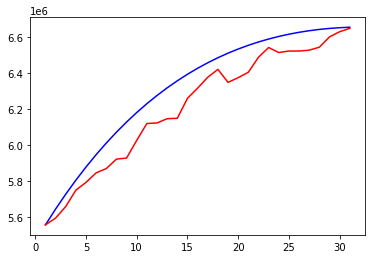

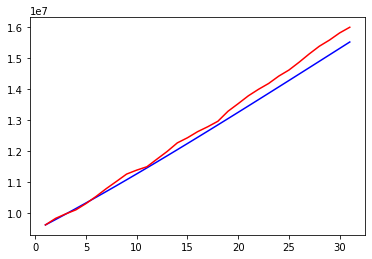

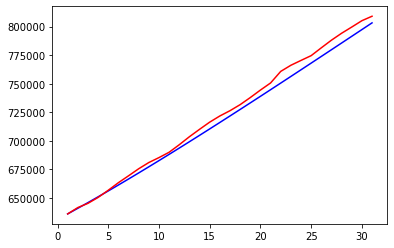

In [129]:
i=6
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

1882118616067535.8
1701600791116656.0
1485880567100286.5
1422129829321215.0
1422129829321215.0
1422129829321215.0
1422129829321215.0
1063026152632310.6
965244308408449.9
965244308408449.9
885012315212311.4
798601309327390.2
798601309327390.2
798601309327390.2
798601309327390.2
710318678224533.2
699022691401389.5
434243995227012.94
313232789868390.6
270706091945498.78
216495248873899.53
34273245367900.145
9118135421519.129
2817708466797.6934
2817708466797.6934
1697225660208.101
1414003144570.2134
1414003144570.2134
651467856271.5674
507619776812.2241
506964907390.9876
244602840846.7488
244602840846.7488
244602840846.7488
208472231571.10712
208472231571.10712
165164538126.9175
165164538126.9175
137172827253.19695
137172827253.19695
137172827253.19695
133657121845.86101
130969452375.46452
112603831606.10405
106539924327.73772
106539924327.73772
106539924327.73772
106539924327.73772
106539924327.73772
106539924327.73772
106539924327.73772
106539924327.73772
106187115935.41794
103964879647.

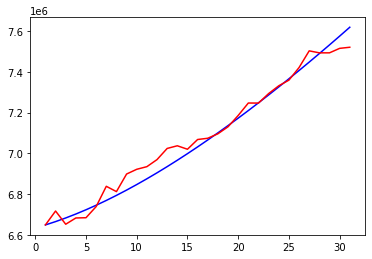

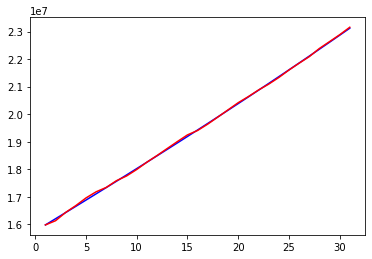

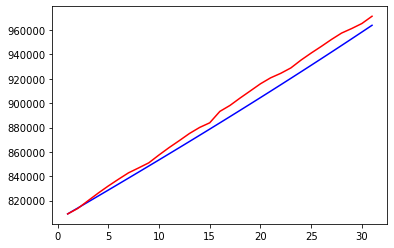

In [130]:
i=7
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

2313152194367840.0
2064810761805795.5
2009430223112918.8
2009430223112918.8
2009430223112918.8
2009430223112918.8
2009430223112918.8
1770458474745336.8
1770458474745336.8
1576941719712435.2
1576941719712435.2
1576941719712435.2
1576941719712435.2
1576941719712435.2
1576941719712435.2
161643863774181.34
161643863774181.34
148026007734002.88
121622649773413.06
84638137916382.27
73486413194162.0
43490491614322.625
34006428449476.03
33638114587565.86
31288341008309.46
31288341008309.46
28119336552228.43
18420864942575.92
18345175353960.113
18345175353960.113
15386425971430.203
15386425971430.203
15386425971430.203
14882244178789.977
14324765678926.99
14324765678926.99
14106443308291.143
14023638763306.787
13933297002886.545
13088863890347.793
13088863890347.793
12704691648556.887
12704691648556.887
12704691648556.887
12704691648556.887
12704691648556.887
12704691648556.887
12704691648556.887
12569453851892.938
12569453851892.938
12569453851892.938
12569453851892.938
12569453851892.938
1256

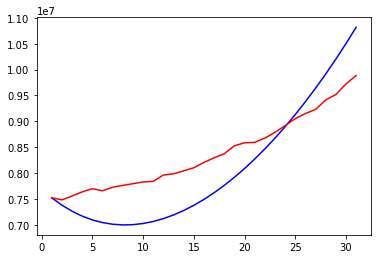

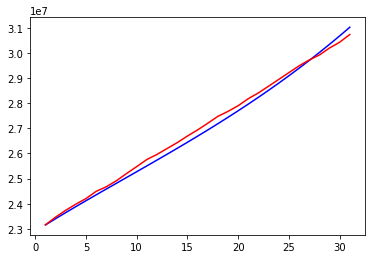

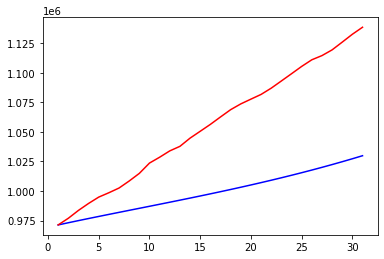

In [131]:
i=8
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

1.2109620720680128e+16
6867647116424547.0
6595000801483396.0
6501383022126635.0
6265411008081813.0
6216366080825238.0
6099502104684904.0
5950631195466470.0
5845042218049542.0
5844529911194222.0
5844529911194222.0
5844529911194222.0
5439141420395574.0
5439141420395574.0
5439141420395574.0
5439141420395574.0
5097659437180805.0
5086831030282185.0
5086831030282185.0
5086831030282185.0
5086831030282185.0
5086831030282185.0
5086831030282185.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
4094344863931311.0
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3714210649450857.5
3684592899045708.0
1804107969280535.0
1254338157106596.2
1252298672376749.5
408385805086151.0
408289118

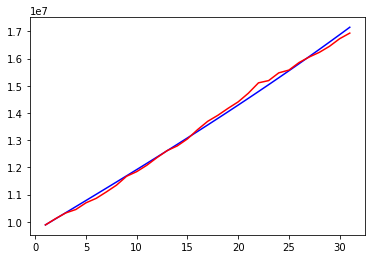

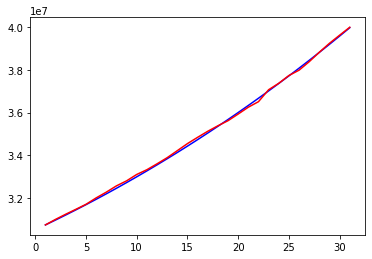

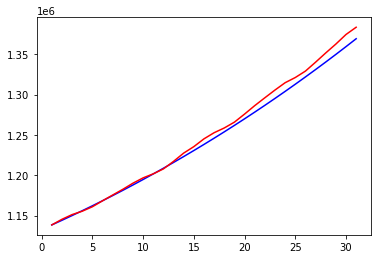

In [132]:
i=9
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

1.8627734212624904e+16
1.1776073829987578e+16
1.1776073829987578e+16
1.1776073829987578e+16
1.1776073829987578e+16
1.0684302176145514e+16
1.068430133302271e+16
9947812743460018.0
9576483900373020.0
9562460514134874.0
8141569739675810.0
2471247513692435.0
2241090687185356.5
1704613080943017.5
1075894910589579.9
735962651583209.5
459096025049310.25
114530650702655.14
42625415427107.92
10749916065945.656
9904159935617.32
7897807074928.231
7897807074928.231
7616816685457.254
6654478433716.317
5159510813662.416
5159510813662.416
5159510813662.416
5159510813662.416
5159510813662.416
5159510813662.416
5156994977400.116
5074609540730.439
5038242886058.429
5037414510305.624
5037414510305.624
5037030827026.8125
5037030827026.8125
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376
5022674388803.376


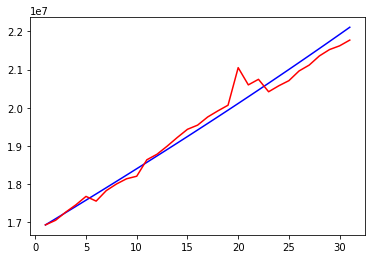

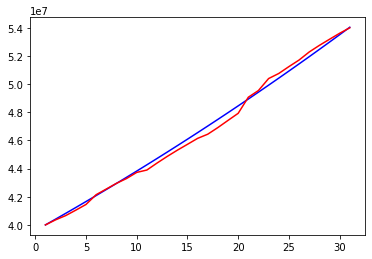

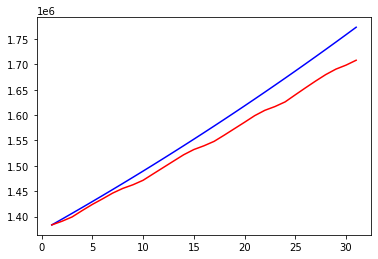

In [133]:
i=10
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

2.95130346785385e+16
2.2999690488732988e+16
2.0435828925394664e+16
1.3659241621587392e+16
1.3659241621587392e+16
1.3659241621587392e+16
1.3659241621587392e+16
1.3659241621587392e+16
1.358583293255904e+16
1.3559933962385274e+16
1.3559933962385274e+16
1.3559933962385274e+16
1.3559933962385274e+16
1.3559933962385274e+16
6724866811159604.0
3520022049684378.0
3002262973927567.0
1966162589193498.2
1510967084378129.5
1510967084378129.5
1294939211428297.0
1260655046028494.0
962658735290849.4
955524031967251.0
771378502524955.1
771378502524955.1
771378502524955.1
665563212414956.4
665563212414956.4
665563212414956.4
596559736175525.8
596559736175525.8
596559736175525.8
596559736175525.8
596559736175525.8
596559736175525.8
596559736175525.8
578728050313457.6
578728050313457.6
578728050313457.6
578728050313457.6
578728050313457.6
577757842446176.0
557828028445409.06
557828028445409.06
557590701059724.75
557590701059724.75
557590701059724.75
557590701059724.75
557590701059724.75
557590701059724.75

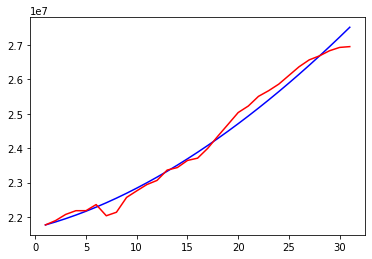

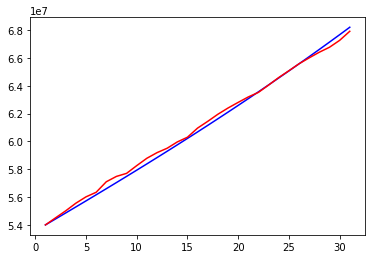

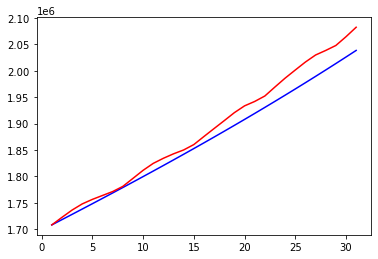

In [134]:
i=11
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

4.415873560761171e+16
2.9841666966003076e+16
2.8927901031977896e+16
2.8927901031977896e+16
2.7836205097459836e+16
2.7836205097459836e+16
2.672154335608991e+16
2.672154335608991e+16
2.6721138836130024e+16
6126634583430739.0
3644028727147223.5
2515962377144439.0
432228405911195.7
194460185643656.8
172586685088911.44
60345734750609.695
60345734750609.695
42653844217208.56
42414621248872.12
37731944236114.29
37731944236114.29
37731944236114.29
37731944236114.29
36190365140431.01
36190365140431.01
36190365140431.01
36190365140431.01
35912672944735.89
35730394928419.66
35730394928419.66
35135236330426.26
35135236330426.26
35135236330426.26
35135236330426.26
35135236330426.26
35135236330426.26
35135236330426.26
34471577588159.746
33472253964340.668
33472253964340.668
33472253964340.668
33472253964340.668
33472253964340.668
33062348867550.742
33062348867550.742
33062348867550.742
33062348867550.742
33062348867550.742
33062348867550.742
33050761188953.195
32983532504404.527
32510711955459.953
3

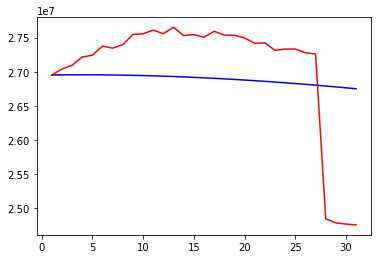

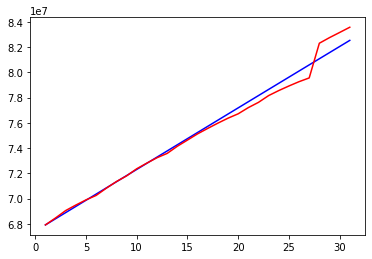

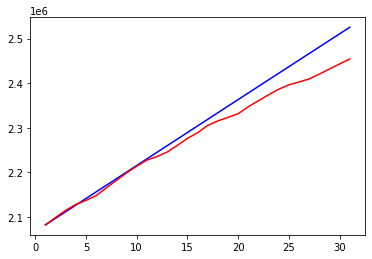

In [135]:
i=12
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

2.737413459611355e+16
2.1215499634594876e+16
1.9057086649541384e+16
5568540333003837.0
5568540333003837.0
5568540333003837.0
1621354866527590.5
105431412149898.56
38411856738457.38
38286117632257.01
36786307098315.64
26259328402676.953
23140977705656.445
20847227628316.95
20847227628316.95
20847227628316.95
15275623959224.348
14903007521655.846
14036684020067.42
14036684020067.42
11331785327613.514
11331785327613.514
11331785327613.514
11331785327613.514
11331785327613.514
11331785327613.514
11205978026993.633
11205978026993.633
11148801927617.29
11046685196955.611
10952016545693.543
10440069916418.943
10151831247804.777
10069233007010.05
9974344698119.232
9974344698119.232
9687455987089.627
7682339183417.712
7380251215514.131
7373100751127.494
7373100751127.494
7373100751127.494
7373100751127.494
7373100751127.494
7373100751127.494
7355511047899.345
7355511047899.345
7355511047899.345
7355511047899.345
7355511047899.345
7355511047899.345
7355511047899.345
7300800860532.62
730080086053

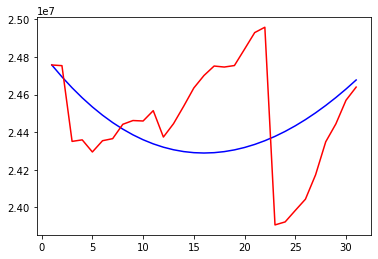

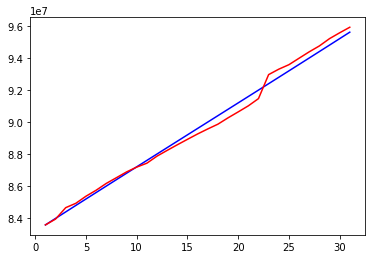

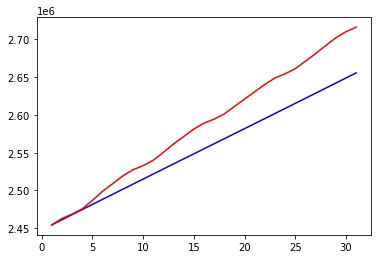

In [136]:
i=13
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

3.4173247543733784e+16
2.369336241714045e+16
2.3693361036882724e+16
4059092884631721.5
3723295957276425.5
978738374072344.0
452673079834625.5
378772528035712.4
354169217221730.75
348427832946021.25
323383816658043.56
292258717592563.9
292258717592563.9
292258717592563.9
292258717592563.9
290206650256381.94
290206650256381.94
290206650256381.94
290206650256381.94
290206650256381.94
290206650256381.94
289946611946040.94
288849581976626.56
288849581976626.56
287557536695904.44
287557536695904.44
287557536695904.44
287557536695904.44
287557536695904.44
287557536695904.44
287557536695904.44
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286724791636255.0
286524796008365.6
286524796008365.6
286524796008365.6
286524796008365.6
286524796008365.6
285511628573165.75
285511628573165.75
285511628573165.75
285511628573165.75
285511628573165.75
285511628573165.75
285511628573165.75
2855

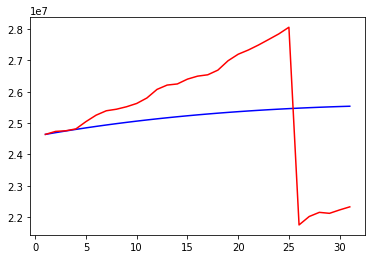

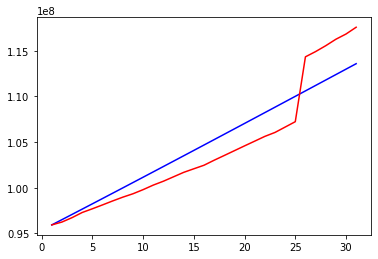

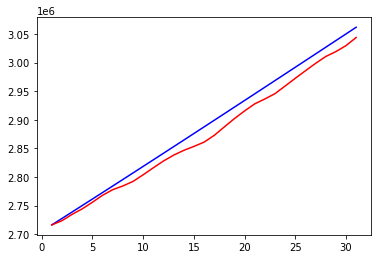

In [137]:
i=14
e0=predict.iloc[30,1]
predict=month_yichuan(e0,i)
print('------------------')
print(e0)
predict.to_csv('predict'+str(i)+'.csv',index=False)

In [138]:
e0=predict.iloc[30,1]
print(e0)
def final_count(s,e,i,r,d,beta,r1,r2d,r2r,n):
    s=s;e=e;i=i;r=r;d=d;beta=beta;r1=r1;r2d=r2d;r2r=r2r;n
    S=[s];E=[e];I=[i];R=[r];D=[d]
    for m in range(6000):
        ds=delta_s(beta,s,i,n)
        de=delta_e(beta,s,i,n,r1,e)
        di=delta_i(r1,e,r2d,r2r,i)
        dr=delta_r(r2r,i)
        dd=delta_d(r2d,i)
        s=s+ds
        e=e+de
        i=i+di
        r=r+dr
        d=d+dd
        S.append(s)
        E.append(e)
        I.append(i)
        R.append(r)
        D.append(d)
    result=pd.DataFrame({
        'S':S,
        'E':E,
        '累计确诊':I,
        '治愈人数':R,
        '死亡人数':D
        })
    return result
def final_yuce(beta,r1,e0,r2d,r2r,month):
    n=7585204179#总人口数
    e=e0#初始的感染但是并没有发病的数量
    i=y1[30*month]#初始的感染数量
    r=y2[30*month]#初始的治愈数量
    d=y3[30*month]#初始的死亡数量
    s=n-e-i-r-d#未被感染数
    beta=beta
    r1=r1
    r2d=r2d
    r2r=r2r
    predict=final_count(s,e,i,r,d,beta,r1,r2d,r2r,n)
    print(n*0.00001)
    return predict
final_result=final_yuce(0.000189208985375,0.00149536138125,412552535,0.000457763671875, 0.02337646484375*2,15)


470608371.92962295
75852.04179
